In [1]:
import sys
sys.path.append("..")
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from minuq.pce import pce

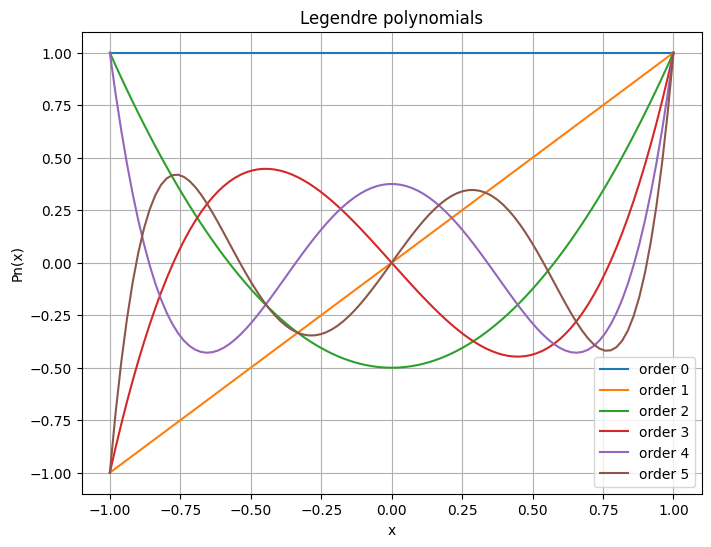

In [2]:
#empty pce object
mypce=pce()

fig, ax = plt.subplots(1,1, figsize=(8,6))

#show legendre basis functions
x = np.linspace(-1,1,100)
for i in range(6):
    p = mypce.legendre(i,x)
    ax.plot(x,p,label=f'order {i}')

ax.grid()
ax.set_title('Legendre polynomials')
ax.set_xlabel("x")
ax.legend()
ax.set_ylabel("Pn(x)");


Num terms: 9
PCE coefficients: [[-7.48450133e-01]
 [ 1.23010918e-01]
 [-1.49713648e+00]
 [ 1.53753089e-01]
 [-3.88311317e-04]
 [ 7.43419914e-02]
 [-8.62913274e-05]
 [ 1.35166833e-02]
 [-2.38697950e-15]]
input data min, max (used for input scaling): [-0.86545174] [0.86460215]


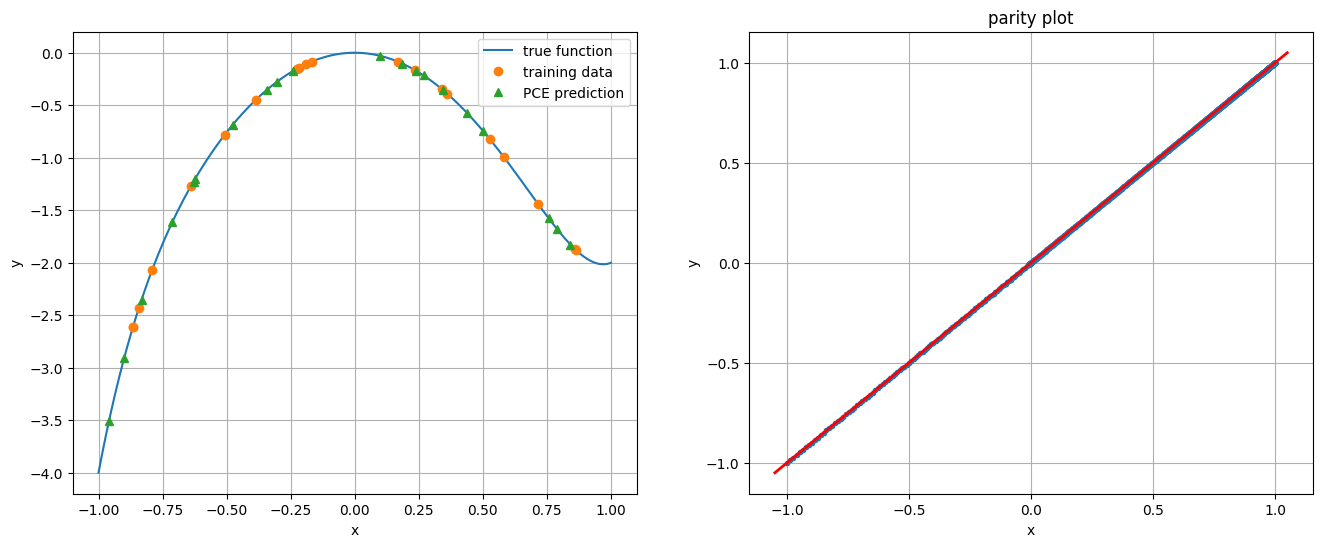

In [11]:
#1D example

#============================
#define true function
x_true= np.linspace(-1,1,1000)
nTrain=20
x_train= np.reshape( np.random.uniform(-1,1,nTrain), (nTrain,1) )
def f1d(x,params) :
    #high order polynomial
    f=x**7. - 3.*x**2.
    #f=x**np.random.uniform(6.,7.) - 3.*x**np.random.uniform(1.,2.) 
    #f=0*x+params[0]
    #for i in range(1,len(params)):
    #    f+=params[0]*x**i
    return f
#expansion coefficients
params=[0.,0.,3.,0.,0.,0.,0.,1.]
y_true=f1d(x_true,params)


#============================

#define PCE (dimension, order, basis type)
p1=pce(dim=1,order=8, basisType='legendre')
#fit the PCE coefficients
y_train=f1d(x_train,params)
p1.fitPCE( x_train,y_train, method='LSQ' )
print("Num terms:",p1.numTerms)
print("PCE coefficients:",p1.coefficients)
print("input data min, max (used for input scaling):", p1.x_mins, p1.x_maxs)

#define prediction input data
x_predict=np.reshape( np.random.uniform(-1,1,20), (20,1))
y_predict=p1.pcePredict(x_predict)


fig,ax = plt.subplots(1,2, figsize=(16,6))

#data plot
ax[0].plot(x_true,y_true)
ax[0].plot(x_train,y_train,'o')
ax[0].plot(x_predict,y_predict.T,'^')
ax[0].grid()
ax[0].legend(['true function', 'training data', 'PCE prediction'])
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

#parity plot, truth vs. PCE prediction
y_predict=p1.pcePredict(np.reshape(x_true, (x_true.shape[0], 1)) )

#rescale y_true and y_predict to [-1,1] for parity plot
y_true -= np.min(y_true)
y_true /=np.max(y_true)/2.
y_true -= 1
y_predict -= np.min(y_predict)
y_predict /=np.max(y_predict)/2.
y_predict -= 1

ax[1].plot(y_true,y_predict.T,'.')
#perfect parity line
ax[1].plot([-1.05,1.05],[-1.05,1.05],linewidth=2,color='r')
ax[1].set_title("parity plot")
ax[1].grid()
ax[1].set_xlabel("x")
ax[1].set_ylabel("y");
